In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('/home/labmwl/bug/Github/spectrometer-mwl/dev/specter/Spectrogram Data/control-4-final-2023-02-02.csv', sep=',',header=0)
data

,time,415nm,445nm,480nm,515nm,555nm,590nm,630nm,680nm,Clear,NIR
0,2023-02-02 10:42:07,3296,11435,5553,13595,26917,30190,23827,11472,59425,4235
1,2023-02-02 10:42:08,3535,12271,5947,14439,29000,32323,25386,12218,63752,4460
2,2023-02-02 10:42:09,3538,12265,5952,14440,28989,32326,25384,12217,63848,4463
3,2023-02-02 10:42:10,3533,12265,5946,14436,28991,32324,25376,12213,63795,4461
4,2023-02-02 10:42:11,3535,12254,5943,14445,28986,32316,25382,12213,63798,4459
...,...,...,...,...,...,...,...,...,...,...,...
180,2023-02-02 10:45:09,3538,12246,5956,14448,29013,32350,25386,12235,63835,4462
181,2023-02-02 10:45:10,3540,12255,5958,14448,29009,32338,25386,12228,63854,4462
182,2023-02-02 10:45:11,3540,12250,5958,14452,29009,32351,25385,12230,63815,4463
183,2023-02-02 10:45:12,3539,12237,5955,14450,29017,32344,25391,12233,63830,4461


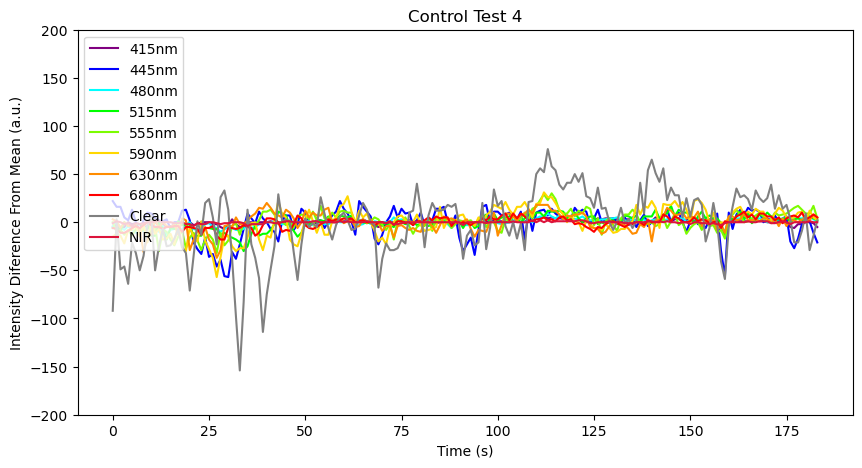

In [4]:
time = data['time'].to_list()
labels = data.columns.to_list()
jdat = data[1:].drop(columns='time').to_numpy().T
col = ['purple','blue','cyan','lime','lawngreen','gold','darkorange','red','gray','crimson']

for i in range(len(jdat)):
    mi = np.mean(jdat[i])
    for j in range(len(jdat[0])):
        jdat[i][j] = jdat[i][j] - mi

fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(jdat)):
    ax.plot(np.arange(len(jdat[0])), jdat[i], color=col[i], label=labels[i+1])
ax.legend()
plt.xlabel('Time (s)')
plt.ylabel('Intensity Diference From Mean (a.u.)')
plt.title('Control Test 4')
plt.ylim(-200,200)
plt.show()
fig.savefig('control-test-mean-4.png', facecolor=fig.get_facecolor(), edgecolor='none')




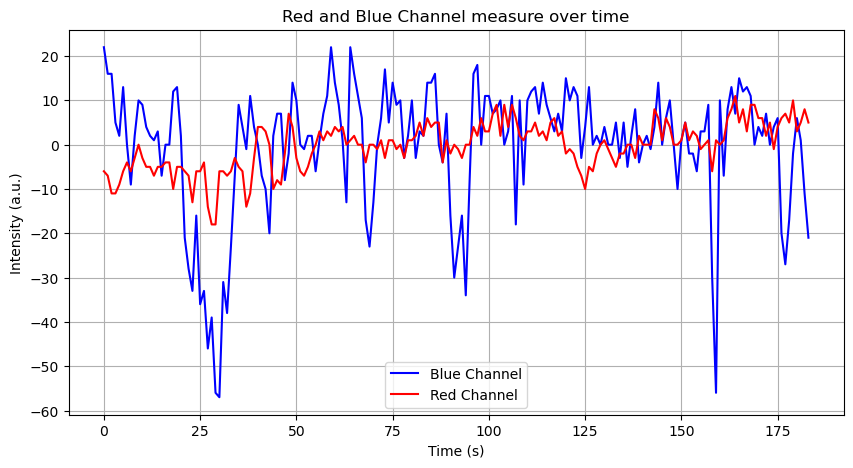

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.arange(len(jdat[0])), jdat[1], label='Blue Channel', color='blue')
ax.plot(np.arange(len(jdat[0])), jdat[7], label='Red Channel', color='red')
plt.grid()
plt.legend()
plt.title('Red and Blue Channel measure over time')
plt.xlabel('Time (s)')
plt.ylabel('Intensity (a.u.)')
plt.show()
#fig.savefig('b-vs-r.png', facecolor=fig.get_facecolor(), edgecolor='none')


In [32]:
# Control means by channel
raw_control = []

raw_control.append(pd.read_csv('/home/labmwl/bug/Github/spectrometer-mwl/dev/specter/Spectrogram Data/control-2023-02-02.csv', sep=',',header=0))
raw_control.append(pd.read_csv('/home/labmwl/bug/Github/spectrometer-mwl/dev/specter/Spectrogram Data/control-2-2023-02-02.csv', sep=',',header=0))
raw_control.append(pd.read_csv('/home/labmwl/bug/Github/spectrometer-mwl/dev/specter/Spectrogram Data/control-3-2023-02-02.csv', sep=',',header=0))
raw_control.append(pd.read_csv('/home/labmwl/bug/Github/spectrometer-mwl/dev/specter/Spectrogram Data/control-4-final-2023-02-02.csv', sep=',',header=0))

test1= []

test1.append(pd.read_csv('/home/labmwl/bug/Github/spectrometer-mwl/dev/specter/Spectrogram Data/1-drop-b-2023-02-02.csv', sep=',',header=0))
test1.append(pd.read_csv('/home/labmwl/bug/Github/spectrometer-mwl/dev/specter/Spectrogram Data/1-drop-r-2023-02-02.csv', sep=',',header=0))

test1.append(pd.read_csv('/home/labmwl/bug/Github/spectrometer-mwl/dev/specter/Spectrogram Data/1-10-b-2023-02-02.csv', sep=',',header=0))
test1.append(pd.read_csv('/home/labmwl/bug/Github/spectrometer-mwl/dev/specter/Spectrogram Data/1-10-r-2023-02-02.csv', sep=',',header=0))

test1.append(pd.read_csv('/home/labmwl/bug/Github/spectrometer-mwl/dev/specter/Spectrogram Data/1-100-b-2023-02-02.csv', sep=',',header=0))
test1.append(pd.read_csv('/home/labmwl/bug/Github/spectrometer-mwl/dev/specter/Spectrogram Data/1-100-r-2023-02-02.csv', sep=',',header=0))

test1.append(pd.read_csv('/home/labmwl/bug/Github/spectrometer-mwl/dev/specter/Spectrogram Data/1-1000-b-2023-02-02.csv', sep=',',header=0))
test1.append(pd.read_csv('/home/labmwl/bug/Github/spectrometer-mwl/dev/specter/Spectrogram Data/1-1000-r-2023-02-02.csv', sep=',',header=0))

def to_jdat(d):
    time = d['time'].to_list()
    labels = d.columns.to_list()
    jdat = d[1:].drop(columns='time').to_numpy().T
    return jdat, labels

def jdat_to_mean(jdat,c):
    for i in range(len(jdat)):
        mi = np.mean(c[i])
        for j in range(len(jdat[0])):
            jdat[i][j] = jdat[i][j] - mi
    return jdat

def mean_graph(dat, c, name):
    dat = to_jdat(dat)
    c = to_jdat(c)[0]
    d = jdat_to_mean(dat[0],c)
    fig, ax = plt.subplots(figsize=(10, 5))
    for i in range(len(d)):
        ax.plot(np.arange(len(d[0])), d[i], color=col[i], label=dat[1][i+1])
    ax.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Intensity Diference From Mean (a.u.)')
    plt.title(str(name))
    plt.ylim(-2000,0)
    plt.show()
    #fig.savefig('control-test-mean-4.png', facecolor=fig.get_facecolor(), edgecolor='none')

col = ['purple','blue','cyan','lime','lawngreen','gold','darkorange','red','gray','crimson']



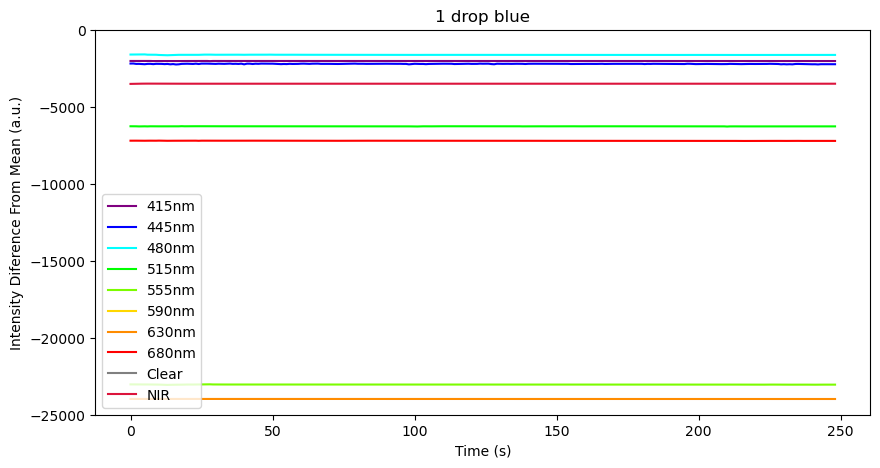

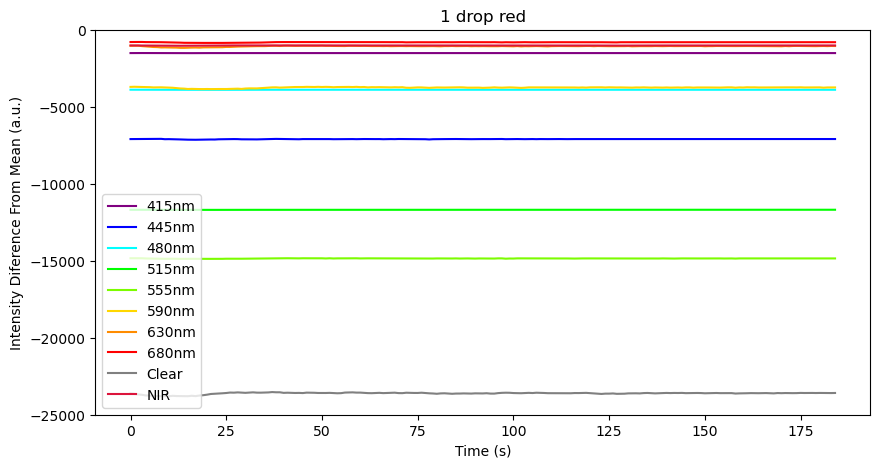

In [27]:
mean_graph(test1[0], raw_control[0], '1 drop blue')
mean_graph(test1[1], raw_control[0], '1 drop red')

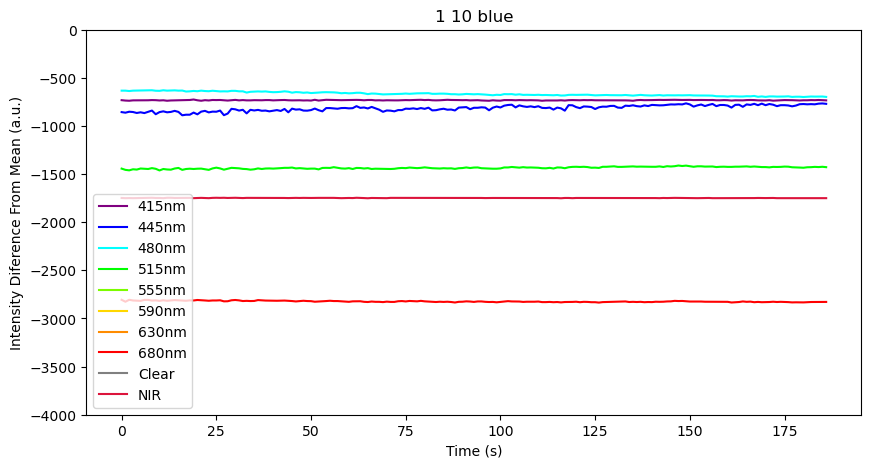

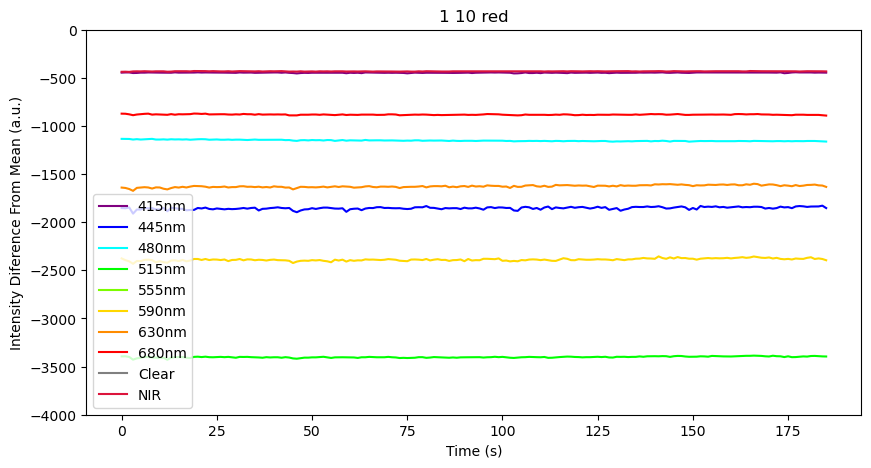

In [30]:
mean_graph(test1[2], raw_control[1], '1 10 blue')
mean_graph(test1[3], raw_control[1], '1 10 red')

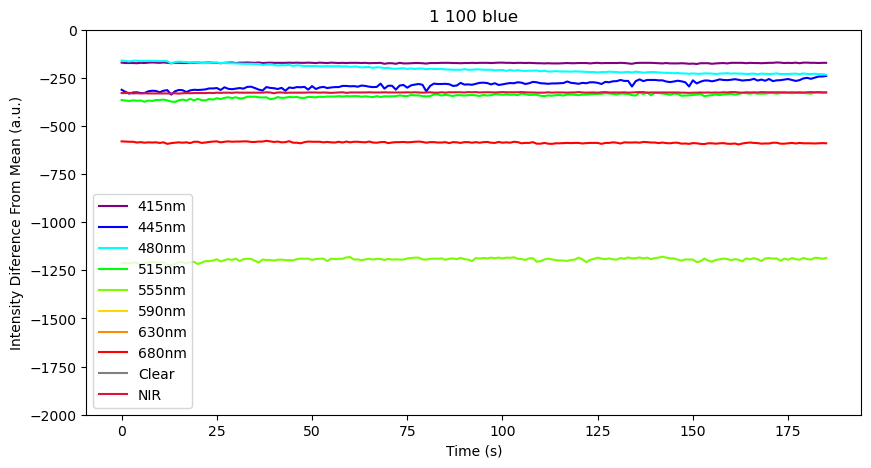

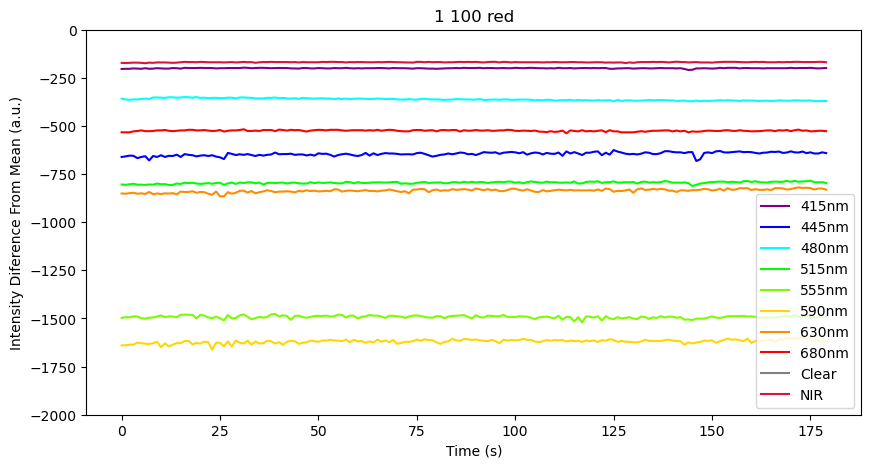

In [33]:
mean_graph(test1[4], raw_control[2], '1 100 blue')
mean_graph(test1[5], raw_control[2], '1 100 red')

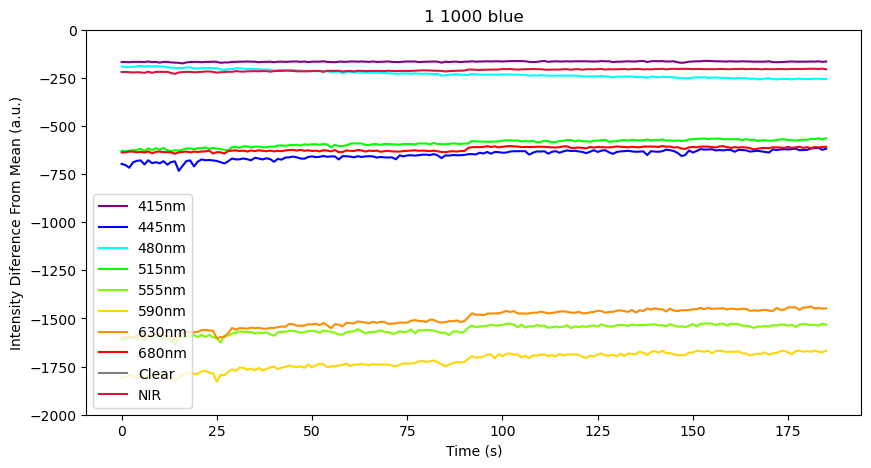

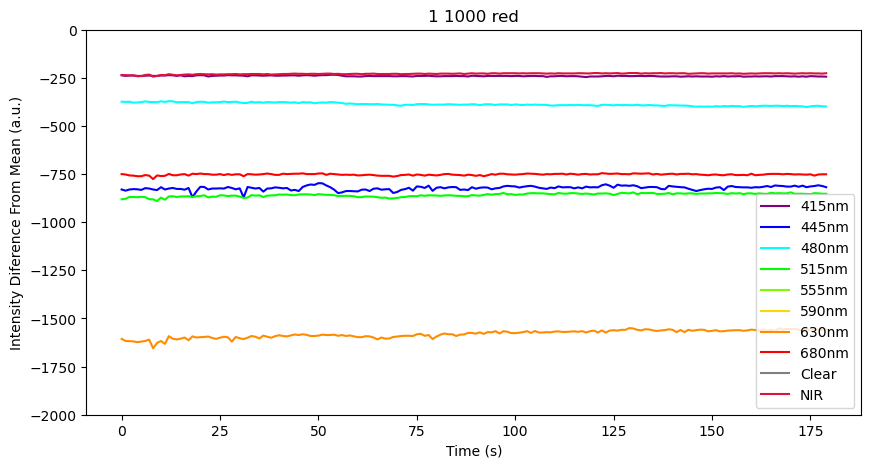

In [34]:
mean_graph(test1[6], raw_control[3], '1 1000 blue')
mean_graph(test1[7], raw_control[3], '1 1000 red')